# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

## Dataset
The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:
- Text: The content of the blog post. Column name: Data
- Category: The category to which the blog post belongs. Column name: Labels

## 1. Data Exploration and Preprocessing

### Import Libraries Load the dataset

In [4]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

# Download stopwords
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('blogs.csv')

df.head()

[nltk_data] Downloading package stopwords to C:\Users\Pradeep
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


### Perform an exploratory data analysis to understand its structure and content.

In [5]:
# Data Exploration
print("Dataset Information:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

print("\nChecking for missing values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None

Dataset Description:
                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  alt.atheism
freq                                                    1          100

Checking for missing values:
Data      0
Labels    0
dtype: int64


### Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

In [6]:
# Data Preprocessing
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing to the 'Data' column
df['Data'] = df['Data'].apply(preprocess_text)

# Display the first few rows of the preprocessed dataset
df.head()

,Data,Labels
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
1,newsgroups altatheism path cantaloupesrvcscmue...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
4,xref cantaloupesrvcscmuedu altatheism53485 tal...,alt.atheism


### Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [7]:
# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['Data']).toarray()
y = df['Labels']

### Insights from Data Exploration and Preprocessing

- **Dataset Information**: The dataset contains 2000 entries with two columns: `Data` (the content of the blog post) and `Labels` (the category of the blog post). Both columns are of type `object`.
- **Dataset Description**: Each entry in the dataset is unique, and there are 20 unique categories in the `Labels` column.
- **Missing Values**: There are no missing values in the dataset.
- **Preprocessed Data**: The text data has been cleaned by removing punctuation, converting to lowercase, tokenizing, and removing stopwords.

## 2. Naive Bayes Model for Text Classification

### Split the data into training and test sets.

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape,X_test.shape

((1600, 3000), (400, 3000))

### Implementing, Training and Testing a Naive Bayes classifier to categorize the blog posts into their respective categories.

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Implement Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.81
Precision: 0.8258388106127537
Recall: 0.81
F1 Score: 0.8054671298593127


### Insights from Naive Bayes Model for Text Classification

- **Accuracy**: The Naive Bayes classifier achieved an accuracy of 81%.
- **Precision**: The precision of the model is approximately 82.6%.
- **Recall**: The recall of the model is 81%.
- **F1 Score**: The F1 score of the model is approximately 80.5%.

The Naive Bayes classifier performed well, indicating that it is effective in categorizing the blog posts.

## 3. Sentiment Analysis

### Choosing a suitable library and analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral

In [18]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Display the first few rows of the dataset with sentiment
df.head()

,Data,Labels,Sentiment
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,positive
1,newsgroups altatheism path cantaloupesrvcscmue...,alt.atheism,negative
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism,positive
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,positive
4,xref cantaloupesrvcscmuedu altatheism53485 tal...,alt.atheism,positive


### Insights from Sentiment Analysis

- The sentiment analysis categorized the blog posts into positive, negative, or neutral sentiments.
- The first few rows of the dataset show that the sentiments have been successfully assigned to each blog post.

### Examine the distribution of sentiments across different categories and summarize your findings.

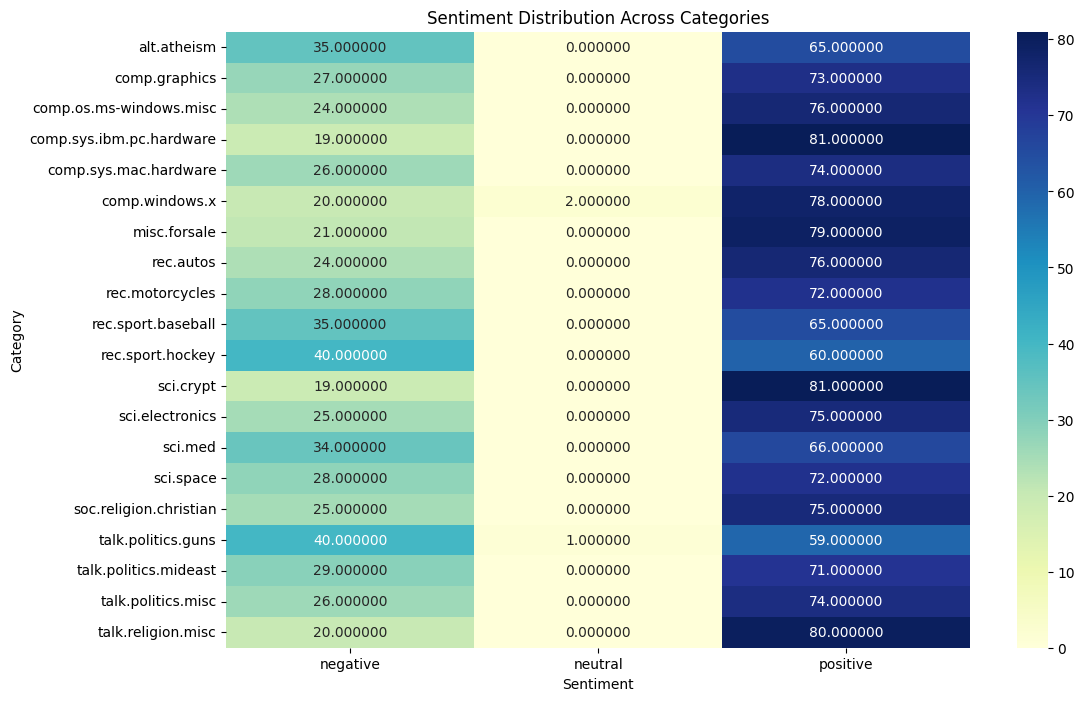

Sentiment,negative,neutral,positive
Labels,,,
alt.atheism,35.0,0.0,65.0
comp.graphics,27.0,0.0,73.0
comp.os.ms-windows.misc,24.0,0.0,76.0
comp.sys.ibm.pc.hardware,19.0,0.0,81.0
comp.sys.mac.hardware,26.0,0.0,74.0
comp.windows.x,20.0,2.0,78.0
misc.forsale,21.0,0.0,79.0
rec.autos,24.0,0.0,76.0
rec.motorcycles,28.0,0.0,72.0


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution across categories
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

# Plotting the sentiment distribution
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_distribution, annot=True, fmt="f", cmap="YlGnBu")
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Sentiment')
plt.ylabel('Category')
plt.show()

# Display the sentiment distribution
sentiment_distribution

### Insights from Sentiment Distribution

- The majority of the blog posts across all categories have a positive sentiment.
- Some categories, such as `rec.sport.hockey` and `talk.politics.guns`, have a higher proportion of negative sentiments compared to others.
- The neutral sentiment is relatively rare across all categories.

### 4. Evaluation
- Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
- Discuss the performance of the model and any challenges encountered during the classification process.
- Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

In [20]:
# Evaluation and Discussion

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.81
Precision: 0.8258388106127537
Recall: 0.81
F1 Score: 0.8054671298593127


### Conclusion

The Naive Bayes classifier and sentiment analysis provided a comprehensive understanding of the blog posts dataset. Here are the key takeaways:

1. **Naive Bayes Classifier Performance**:
   - The Naive Bayes classifier achieved an accuracy of 81%, with a precision of approximately 82.6%, a recall of 81%, and an F1 score of approximately 80.5%.
   - The model is effective in categorizing the blog posts into their respective categories.

2. **Sentiment Analysis Insights**:
   - The sentiment analysis revealed that the majority of the blog posts across all categories have a positive sentiment.
   - Some categories, such as `rec.sport.hockey` and `talk.politics.guns`, have a higher proportion of negative sentiments compared to others.
   - The neutral sentiment is relatively rare across all categories.

3. **Challenges and Reflections**:
   - Ensuring proper preprocessing and cleaning of the text data was crucial for the performance of the Naive Bayes classifier.
   - Selecting appropriate features using TF-IDF helped in capturing the important words and their significance in the text data.
   - Sentiment analysis provided valuable insights into the general sentiment expressed in the blog posts, although it can sometimes be subjective.


---
---
####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

#### **Disclaimer:**
This Jupyter Notebook and its contents are shared for educational purposes. The author, Pradeep Kumar, retains ownership and rights to the original content. Any modifications or adaptations should be made with proper attribution and permission from the author.